# 5th homework of data mining
Parsa KamaliPour - 97149081

In [141]:
from copy import deepcopy

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display_functions import display
from sklearn.preprocessing import OneHotEncoder

In [142]:
dataset = pd.read_csv("penguins.csv")
display(dataset)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## Drop NaN

In [143]:
data_back = deepcopy(dataset)
dataset.dropna(
    subset=[
        'species', 'island', 'bill_length_mm', 'bill_depth_mm',
        'flipper_length_mm', 'body_mass_g', 'sex'
    ],
    inplace=True
)
display(dataset)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## Normalize features

In [144]:
ss = StandardScaler()
dataset.iloc[:, 2:-1] = ss.fit_transform(dataset.iloc[:, 2:-1])
display(dataset)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,MALE
1,Adelie,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,FEMALE
2,Adelie,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,FEMALE
4,Adelie,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,FEMALE
5,Adelie,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,0.587352,-1.762145,0.931283,0.892957,FEMALE
340,Gentoo,Biscoe,0.514098,-1.457000,1.002739,0.799674,FEMALE
341,Gentoo,Biscoe,1.173384,-0.744994,1.502928,1.919069,MALE
342,Gentoo,Biscoe,0.221082,-1.202712,0.788372,1.234995,FEMALE


In [145]:
dataset = dataset.reset_index(drop=True)
display(dataset)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,MALE
1,Adelie,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,FEMALE
2,Adelie,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,FEMALE
3,Adelie,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,FEMALE
4,Adelie,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,0.587352,-1.762145,0.931283,0.892957,FEMALE
329,Gentoo,Biscoe,0.514098,-1.457000,1.002739,0.799674,FEMALE
330,Gentoo,Biscoe,1.173384,-0.744994,1.502928,1.919069,MALE
331,Gentoo,Biscoe,0.221082,-1.202712,0.788372,1.234995,FEMALE


In [146]:
le_spe = LabelEncoder()
dataset['species'] = le_spe.fit_transform(dataset[['species']])
display(dataset)

d:\github\introduction-to-data-mining\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,MALE
1,0,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,FEMALE
2,0,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,FEMALE
3,0,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,FEMALE
4,0,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,MALE
...,...,...,...,...,...,...,...
328,2,Biscoe,0.587352,-1.762145,0.931283,0.892957,FEMALE
329,2,Biscoe,0.514098,-1.457000,1.002739,0.799674,FEMALE
330,2,Biscoe,1.173384,-0.744994,1.502928,1.919069,MALE
331,2,Biscoe,0.221082,-1.202712,0.788372,1.234995,FEMALE


In [147]:
le_isl = LabelEncoder()
dataset['island'] = le_isl.fit_transform(dataset[['island']])
display(dataset)

d:\github\introduction-to-data-mining\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,-0.896042,0.780732,-1.426752,-0.568475,MALE
1,0,2,-0.822788,0.119584,-1.069474,-0.506286,FEMALE
2,0,2,-0.676280,0.424729,-0.426373,-1.190361,FEMALE
3,0,2,-1.335566,1.085877,-0.569284,-0.941606,FEMALE
4,0,2,-0.859415,1.747026,-0.783651,-0.692852,MALE
...,...,...,...,...,...,...,...
328,2,0,0.587352,-1.762145,0.931283,0.892957,FEMALE
329,2,0,0.514098,-1.457000,1.002739,0.799674,FEMALE
330,2,0,1.173384,-0.744994,1.502928,1.919069,MALE
331,2,0,0.221082,-1.202712,0.788372,1.234995,FEMALE


In [148]:
le_sex = LabelEncoder()
dataset['sex'] = le_sex.fit_transform(dataset[['sex']])
display(dataset)

d:\github\introduction-to-data-mining\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,-0.896042,0.780732,-1.426752,-0.568475,1
1,0,2,-0.822788,0.119584,-1.069474,-0.506286,0
2,0,2,-0.676280,0.424729,-0.426373,-1.190361,0
3,0,2,-1.335566,1.085877,-0.569284,-0.941606,0
4,0,2,-0.859415,1.747026,-0.783651,-0.692852,1
...,...,...,...,...,...,...,...
328,2,0,0.587352,-1.762145,0.931283,0.892957,0
329,2,0,0.514098,-1.457000,1.002739,0.799674,0
330,2,0,1.173384,-0.744994,1.502928,1.919069,1
331,2,0,0.221082,-1.202712,0.788372,1.234995,0


## Split Test & Train

In [149]:
X = dataset.iloc[:, 0:-1]
y = dataset[['sex']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [150]:
display(X_train)
display(y_train)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
289,2,0,1.301579,-0.439849,1.360017,2.230012
285,2,0,0.459158,-1.202712,1.145650,1.234995
87,0,1,-0.804474,0.475587,-1.069474,0.302166
152,1,1,0.385904,0.526444,-1.641118,-1.190361
258,2,0,-0.071934,-1.660430,1.145650,0.861863
...,...,...,...,...,...,...
49,0,0,-0.474831,0.729875,-0.712196,-0.630663
104,0,0,-1.079177,-0.338134,-0.212006,-0.475192
267,2,0,0.459158,-1.406143,1.145650,0.861863
98,0,0,-1.115804,0.729875,-0.569284,-1.594587


,sex
289,1
285,0
87,1
152,0
258,0
...,...
49,1
104,0
267,0
98,0


In [151]:
display(X_test)
display(y_test)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
36,0,1,-0.584712,0.628159,-0.426373,-0.381909
332,2,0,1.081817,-0.541564,0.859828,1.483749
269,2,0,-0.035307,-1.660430,0.502550,0.115600
158,1,1,0.550725,0.068726,-1.140929,-0.630663
142,0,1,-1.463761,0.323014,-0.426373,-0.941606
...,...,...,...,...,...,...
105,0,0,0.294336,1.594453,-0.712196,0.488731
134,0,1,-0.694593,-0.032989,-0.569284,-1.003795
136,0,1,-2.177987,-0.846709,-0.926562,-1.439115
23,0,0,-1.115804,0.729875,-2.069852,-1.314738


,sex
36,1
332,1
269,0
158,0
142,0
...,...
105,1
134,0
136,0
23,0


## Do KNN with K = 5

In [152]:
classifier_sex = KNeighborsClassifier(n_neighbors=5)
classifier_sex.fit(X_train, y_train)
y_prediction = classifier_sex.predict(X_test)

d:\github\introduction-to-data-mining\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## confusion_matrix & classification_report

In [153]:
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

[[30  5]
 [ 2 30]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        35
           1       0.86      0.94      0.90        32

    accuracy                           0.90        67
   macro avg       0.90      0.90      0.90        67
weighted avg       0.90      0.90      0.90        67



## for species

In [154]:
X_s = dataset.iloc[:, 1:]
y_s = dataset[['species']]
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size = 0.2)

In [155]:
display(X_s_train)
display(y_s_train)

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
122,2,-0.914355,-0.032989,-0.712196,-1.439115,0
287,0,0.843741,-0.592422,2.074573,1.981258,1
236,0,0.459158,-1.355285,0.859828,0.239977,0
167,1,0.825428,0.170442,-0.712196,-1.003795,1
83,1,-0.932669,0.831590,-0.783651,-0.755041,0
...,...,...,...,...,...,...
208,1,0.312649,-0.083846,-0.426373,-0.692852,0
186,1,0.916995,1.187592,0.645461,-0.319720,1
202,1,0.221082,-0.287276,-0.712196,-1.190361,0
249,0,-0.255069,-1.762145,0.859828,0.924052,0


,species
122,0
287,2
236,2
167,1
83,0
...,...
208,1
186,1
202,1
249,2


In [156]:
display(X_s_test)
display(y_s_test)

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
38,1,0.019633,1.289308,-0.354918,0.239977,1
108,0,-0.804474,1.797883,-0.712196,-0.381909,0
323,0,-0.090248,-0.999282,0.859828,0.550920,0
231,0,0.953622,-0.999282,1.431472,2.603144,1
27,1,-0.822788,0.323014,-0.926562,-1.128172,0
...,...,...,...,...,...,...
192,1,1.118444,0.373872,-0.783651,-1.003795,0
68,2,-1.555328,0.170442,-0.783651,-0.630663,0
47,0,-0.364950,1.187592,-0.069095,-0.195343,1
58,0,-1.390507,-0.032989,-1.212385,-1.687870,0


,species
38,0
108,0
323,2
231,2
27,0
...,...
192,1
68,0
47,0
58,0


## Do KNN with K = 5

In [157]:
classifier_spi = KNeighborsClassifier(n_neighbors=5)
classifier_spi.fit(X_s_train, y_s_train)
y_s_prediction = classifier_spi.predict(X_s_test)

d:\github\introduction-to-data-mining\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## confusion_matrix & classification_report

In [158]:
print(confusion_matrix(y_s_test, y_s_prediction))
print(classification_report(y_s_test, y_s_prediction))

[[32  0  0]
 [ 0  9  0]
 [ 0  0 26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        26

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



## for Island

In [159]:
X_i = dataset[['species','bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
y_i = dataset[['island']]
X_i_train, X_i_test, y_i_train, y_i_test = train_test_split(X_i, y_i, test_size = 0.2)

In [160]:
display(X_i_train)
display(y_i_train)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
255,2,0.239395,-1.762145,0.645461,0.115600,0
41,0,-0.529772,0.933305,-1.355296,-0.972701,1
73,0,-0.346637,0.984162,-0.426373,-0.257532,1
150,1,1.594595,1.340165,-0.283462,-0.599569,1
1,0,-0.822788,0.119584,-1.069474,-0.506286,0
...,...,...,...,...,...,...
249,2,-0.255069,-1.762145,0.859828,0.924052,0
167,1,0.825428,0.170442,-0.712196,-1.003795,1
185,1,1.741103,1.391023,0.288183,0.364354,1
234,2,1.136757,-1.457000,1.217106,1.856881,1


,island
255,0
41,1
73,2
150,1
1,2
...,...
249,0
167,1
185,1
234,0


In [161]:
display(X_i_test)
display(y_i_test)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
244,2,-0.218442,-1.507858,0.574005,0.613109,0
164,1,0.440844,0.729875,-0.783651,-0.941606,0
328,2,0.587352,-1.762145,0.931283,0.892957,0
123,0,0.019633,0.424729,0.645461,-0.257532,1
125,0,-0.163502,1.035020,-0.283462,-0.879418,1
...,...,...,...,...,...,...
306,2,0.092887,-1.253570,0.931283,0.799674,0
280,2,-0.090248,-1.507858,1.360017,0.613109,0
13,0,-1.756777,0.628159,-1.212385,-1.097078,0
66,0,-0.804474,0.017869,-0.354918,-0.817229,0


,island
244,0
164,1
328,0
123,2
125,2
...,...
306,0
280,0
13,2
66,2


## Do KNN with K = 5

In [162]:
classifier_isl = KNeighborsClassifier(n_neighbors=5)
classifier_isl.fit(X_i_train, y_i_train)
y_i_prediction = classifier_isl.predict(X_i_test)

d:\github\introduction-to-data-mining\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## confusion_matrix & classification_report

In [163]:
print(confusion_matrix(y_i_test, y_i_prediction))
print(classification_report(y_i_test, y_i_prediction))

[[23  9  1]
 [ 3 19  0]
 [ 3  8  1]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74        33
           1       0.53      0.86      0.66        22
           2       0.50      0.08      0.14        12

    accuracy                           0.64        67
   macro avg       0.61      0.55      0.51        67
weighted avg       0.65      0.64      0.61        67



## count error rate in for K

In [175]:
error = []
for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_s_train, y_s_train)
    predict = knn.predict(X_s_test)
    error.append(np.mean(predict != np.array( y_s_test)))

d:\github\introduction-to-data-mining\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\github\introduction-to-data-mining\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\github\introduction-to-data-mining\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\github\introduction-to-data-mining\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was pas

Text(0, 0.5, 'Mean Error')

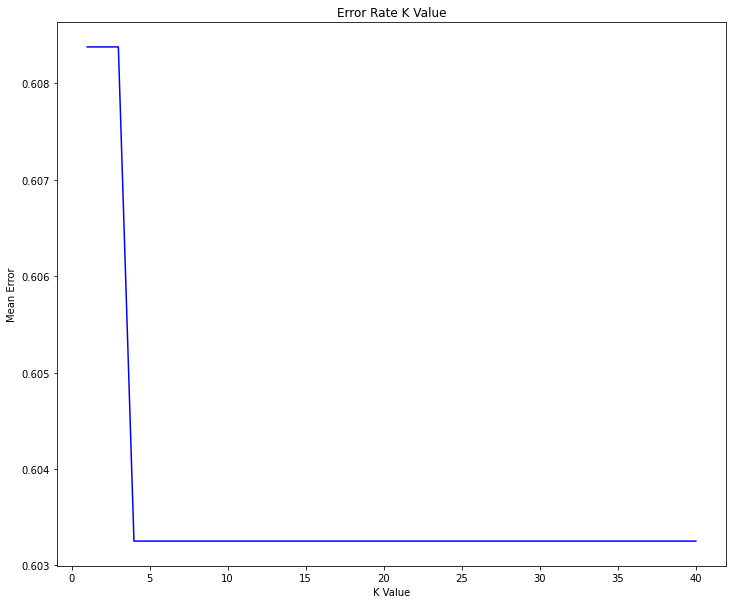

In [182]:
plt.figure(figsize=(12, 10))
plt.plot(range(1, 41), error, color='blue', markerfacecolor='red')
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')